## Observations and Insights 

* Ramicance and Capomulin have more time points potentially indicating the mice live longer
* The sex distribution is almost equal so there is a good balance of sexes, comrising 49.6% females and 50.4% males
* Capomulin and Ramicane had smaller Final Tumor Volumes compared to Infubinol and Ceftamin
* Ceftamin had a larger range of Final Tumor Volumes compared to Capomulin, Ramicane, and Infubinol
* Infubinol group had a single outlier - should be investigated

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Full join on Mouse ID
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
# Counting only uniquie Mouse ID values from the merged data
mice_count = len(merge_df["Mouse ID"].unique())
print("There are", mice_count, "mice")

There are 249 mice


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]

print("Duplicate Rows based on 2 columns are:", duplicateRowsDF, sep='\n')

Duplicate Rows based on 2 columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I believe we are dropping this mouse altogether as we don't know which duplicated values are the correct ones
# so for the purose of data integrity we are dropping this mouse entirely

clean_df = merge_df[merge_df['Mouse ID'] != 'g989']

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = len(clean_df["Mouse ID"].unique())
print("There are now", new_mice_count, "mice")

There are now 248 mice


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


regimen_group = clean_df.groupby("Drug Regimen")
mean = regimen_group["Tumor Volume (mm3)"].mean()
median = regimen_group["Tumor Volume (mm3)"].median()
variance = regimen_group["Tumor Volume (mm3)"].var()
std_dev = regimen_group["Tumor Volume (mm3)"].std()
sem = regimen_group["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({
                            "Mean Tumor Volume (mm3)": mean,
                            "Median Tumor Volume (mm3)": median,
                            "Variance": variance,
                            "Standard Deviation": std_dev,
                            "SEM": sem
                          })
summary_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(Mean_Tumor_Volume="mean", Median_Tumor_Volume="median", Variance="var", StdDeviation="std", SEM="sem")

,Mean_Tumor_Volume,Median_Tumor_Volume,Variance,StdDeviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

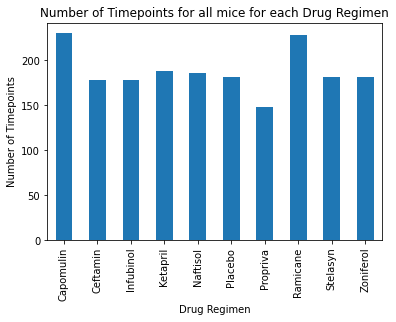

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = regimen_group["Timepoint"].count()

timepoints.plot(kind="bar", x="Drug Regimen", y="Timepoint")
plt.title("Number of Timepoints for all mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show



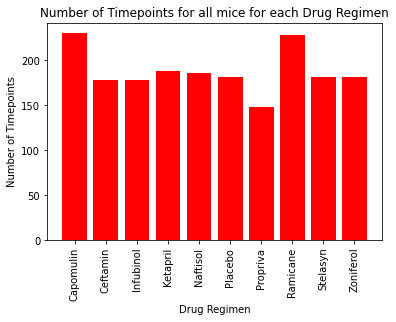

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimens = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
plt.bar(regimens, timepoints, color='r', alpha=1, align="center")
plt.title("Number of Timepoints for all mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation = 90)
plt.show()



(-1.103184371606931,
 1.1001516367431872,
 -1.1018390827045563,
 1.103492681505578)

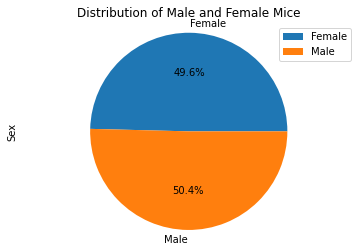

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
unique_mice_df = clean_df.drop_duplicates(subset="Mouse ID")
unique_mice_df

sex_group = unique_mice_df.groupby("Sex")
sex_count = sex_group["Sex"].count()

sex_count.plot(kind="pie", y='Sex', title="Distribution of Male and Female Mice", autopct="%1.1f%%")
plt.legend()
plt.axis("equal")






(-1.103184371606931,
 1.1001516367431872,
 -1.1018390827045563,
 1.103492681505578)

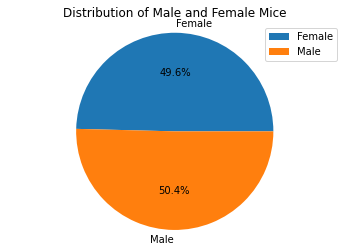

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
plt.pie(sex_count, labels=labels, autopct="%1.1f%%")
plt.title("Distribution of Male and Female Mice")
plt.legend()
plt.axis("equal")



## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_df.groupby("Mouse ID")
max_timepoints = mouse_group["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoints_df = pd.merge(clean_df, max_timepoints, on="Mouse ID", how="outer")
max_timepoints_df = max_timepoints_df.rename(columns={"Timepoint_x":"Timepoint","Timepoint_y":"Final Timepoint"})

only_final_values = max_timepoints_df.loc[max_timepoints_df["Timepoint"] == max_timepoints_df["Final Timepoint"], :]
only_final_values = only_final_values[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
only_final_values = only_final_values.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume"})


# Four Regimen Groups
# capomulin_group = only_final_values.loc[only_final_values["Drug Regimen"] == "Capomulin", :]
# ramicane_group = only_final_values.loc[only_final_values["Drug Regimen"] == "Ramicane", :]
# infubinol_group = only_final_values.loc[only_final_values["Drug Regimen"] == "Infubinol", :]
# ceftamin_group = only_final_values.loc[only_final_values["Drug Regimen"] == "Ceftamin", :]

# print(capomulin_group)
# print(ramicane_group)
# print(infubinol_group)
# print(ceftamin_group)



In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_final = only_final_values.loc[only_final_values["Drug Regimen"] == treatment, :]
    
    # add subset 
    tumor_vol.append(treatment_final["Final Tumor Volume"])
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_final["Final Tumor Volume"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#    outliers = []
#     for outlier in tumor_vol:
#          if (outlier < lower_bound) or (outlier > upper_bound):
#             outliers.append(outlier)
    
    print(f"{treatment} group outliers:")
    print(f"Lower Boundary: {round(lower_bound,2)} (Values below this may be outliers)")
    print(f"Upper Boundary: {round(upper_bound,2)} (Values above this may be outliers)\n")
#    print(f"Outliers: {outliers}")

Capomulin group:
Lower Boundary: 20.7 (Values below this may be outliers)
Upper Boundary: 51.83 (Values above this may be outliers)

Ramicane group:
Lower Boundary: 17.91 (Values below this may be outliers)
Upper Boundary: 54.31 (Values above this may be outliers)

Infubinol group:
Lower Boundary: 36.83 (Values below this may be outliers)
Upper Boundary: 82.74 (Values above this may be outliers)

Ceftamin group:
Lower Boundary: 25.36 (Values below this may be outliers)
Upper Boundary: 87.67 (Values above this may be outliers)



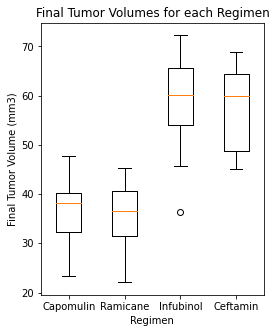

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(4,5))
plt.boxplot(tumor_vol)
plt.title("Final Tumor Volumes for each Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Regimen")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

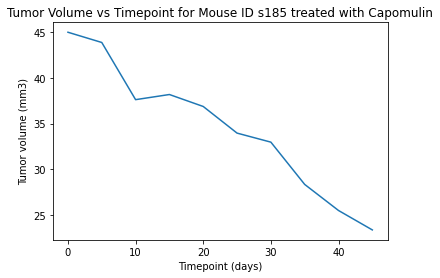

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
#get single mouse from Capomulin df
mouse_s185 = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185", :]
#line chart
x_axis = mouse_s185["Timepoint"]
y_axis = mouse_s185["Tumor Volume (mm3)"]
plt.title("Tumor Volume vs Timepoint for Mouse ID s185 treated with Capomulin")
plt.ylabel("Tumor volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.plot(x_axis, y_axis)
plt.show()

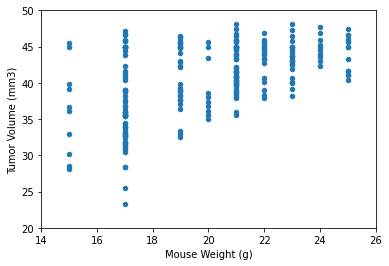

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(14,26)
plt.ylim(20, 50)
plt.show()

Pearsonr Correlation:
The correlation of Tumor Volume (mm3) with Mouse Weight (g) is: 0.53, indicating a Moderate correlation.


Text(0.5, 1.0, 'Relationship between RM and MEDV (R-squared: 0.276)')

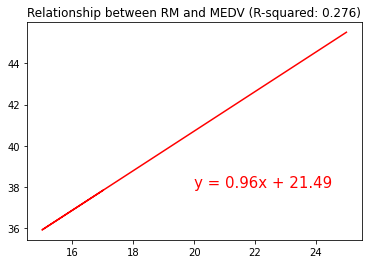

In [24]:
## Correlation and Regression

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

## HAD TO ADD  %matplotlib notebook to dependencies to Plot the linear regression model on top of the previous scatter plot.

correlation, _ = st.pearsonr(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
print("Pearsonr Correlation:")
print(f"The correlation of Tumor Volume (mm3) with Mouse Weight (g) is: {round(correlation, 2)}, indicating a Moderate correlation.")

# Define scatter values for x and y axis
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]

# Compute regression line
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Get y_axis values for the the regression line and add to plot
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

# Get string with the equation formula and add to plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

# Add title with the value for the r-squared
plt.title(f"Relationship between RM and MEDV (R-squared: {round(rvalue**2, 3)})")

## LINEAR REGRESSION LINE DOES NOT DISPLAY ON PREVIOUS SCATTER PLOT UNLESS %matplotlib notebook is used, but it messes up the other charts
